## 発現変動遺伝子解析 (DEseq2) の結果をMA plotとして可視化する
`DESeq2`で検出された発現変動遺伝子について解析。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# color-blind safe color scheme from https://personal.sron.nl/~pault/#fig:scheme_bright
blue, cyan, green, yellow = "#4477AA", "#66CCEE", "#228833", "#CCBB44"
red, purple, grey, black = "#EE6677", "#AA3377", "#BBBBBB", "#333333"

In [2]:
# Set threshold of q_value
q_value = 0.05
FC_threshold = 1.5

def is_deg(df):
    log2FC = np.log2(FC_threshold)
    if (df["q.value"] < q_value) & (df["log2FC"] > log2FC ):
        return "up"
    elif (df["q.value"] < q_value) & (df["log2FC"] < -log2FC):
        return "down"
    else:
        return "ns"

### MA plot

In [10]:
df1 = pd.read_csv("../rscript/deseq2_v2/result/Total_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(readCount)")
df2 = pd.read_csv("../rscript/deseq2_v2/result/P-TRAP_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(readCount)")
df3 = pd.read_csv("../rscript/deseq2_v2/result/L10a-TRAP_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(readCount)")

# リードカウント0のサンプルが1つ以上ある遺伝子を除外
df1["zero"] = df1.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df2["zero"] = df2.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df3["zero"] = df3.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df1 = df1[df1["zero"] == 0]
df2 = df2[df2["zero"] == 0]
df3 = df3[df3["zero"] == 0]

df1["log2_baseMean"] = df1["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)
df2["log2_baseMean"] = df2["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)
df3["log2_baseMean"] = df3["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)

df1["deg"] = df1.apply(is_deg, axis=1) 
df2["deg"] = df2.apply(is_deg, axis=1)
df3["deg"] = df3.apply(is_deg, axis=1)    

df1.head()

,DMSO.Total.1,DMSO.Total.2,DMSO.Total.3,TPG.Total.1,TPG.Total.2,TPG.Total.3,p.value,q.value,ranking,log2FC,lfcSE,baseMean,stat,zero,log2_baseMean,deg
rownames(readCount),,,,,,,,,,,,,,,,
SAMD11|ENSG00000187634.13|chr1,1626,1174,1282,1792,1673,1543,0.017489,0.081566,2340.0,0.209249,0.088058,1497.086840,2.376266,0,10.547942,ns
NOC2L|ENSG00000188976.11|chr1,1354,1074,1091,1177,1088,1051,0.050910,0.172862,3298.0,-0.172670,0.088447,1131.408136,-1.952238,0,10.143904,ns
KLHL17|ENSG00000187961.15|chr1,94,45,77,125,117,144,0.011646,0.060587,2088.0,0.763609,0.302695,98.774756,2.522699,0,6.626070,ns
HES4|ENSG00000188290.11|chr1,1143,941,801,1255,1126,1169,0.039311,0.144875,3016.0,0.214774,0.104213,1060.986766,2.060918,0,10.051191,ns
ISG15|ENSG00000187608.10|chr1,62,32,37,55,36,44,0.938518,0.974955,13811.0,-0.032436,0.420526,43.737303,-0.077132,0,5.450792,ns


In [11]:
# save df as CSV files
df1.to_csv("../results/tables/DESeq2_RNA_ReadCount.csv")
df2.to_csv("../results/tables/DESeq2_P0_ReadCount.csv")
df3.to_csv("../results/tables/DESeq2_L10a_ReadCount.csv")

Up: 426, Down: 230 (q.value < 0.05, FC threshold: 1.5)
Up: 443, Down: 345 (q.value < 0.05, FC threshold: 1.5)
Up: 408, Down: 373 (q.value < 0.05, FC threshold: 1.5)


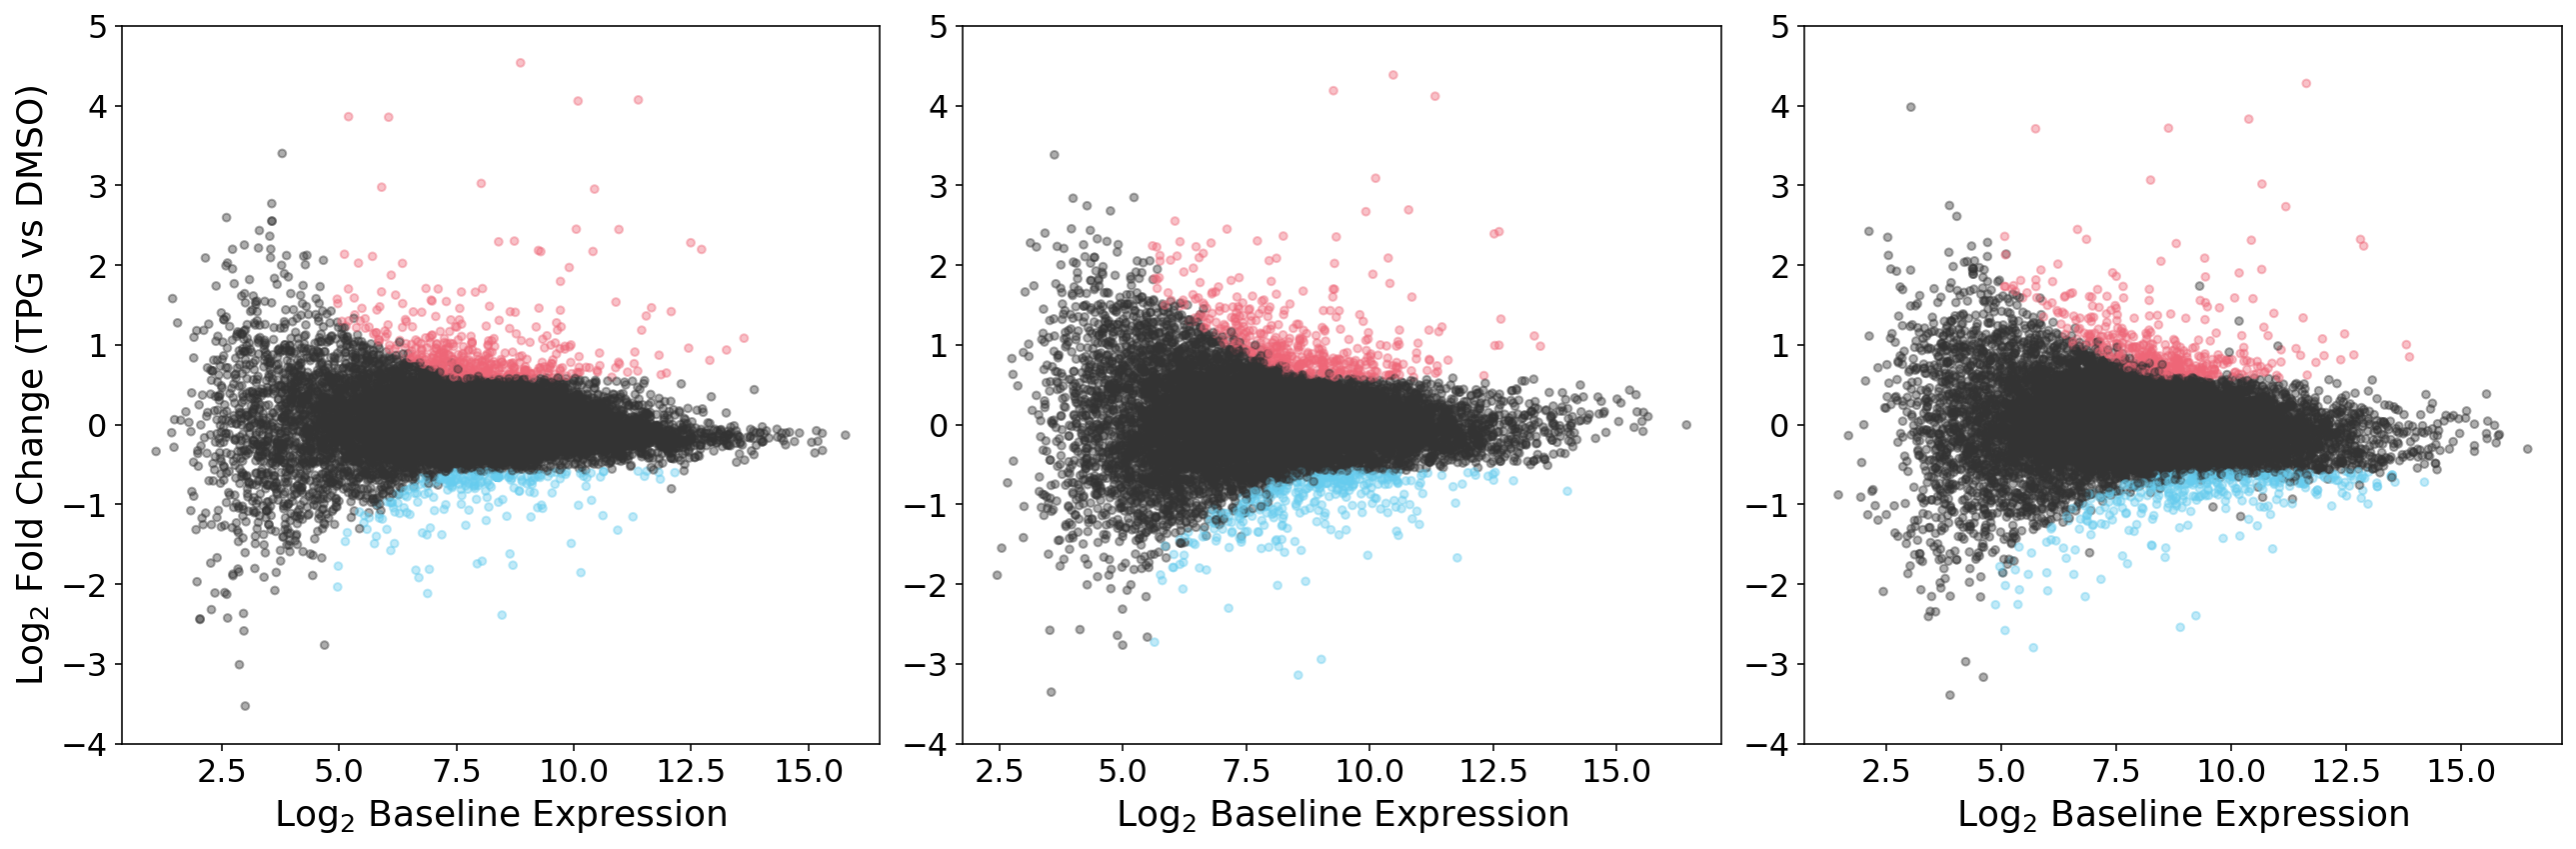

In [12]:
fig = plt.figure(figsize=(18, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

color = {"up":red, "down":cyan, "ns":black}

for ax, df in zip((ax1, ax2, ax3), (df1, df2, df3)):
    ax.tick_params(direction="out", labelsize=16)
    ax.set_xlabel("Log" + "$_{2}$" + " Baseline Expression", fontsize=18)
    ax1.set_ylabel("Log" + "$_{2}$" + " Fold Change (TPG vs DMSO)", fontsize=18)
    ax.set_ylim(-4, 5)
    ax.scatter(df["log2_baseMean"], df["log2FC"],  color=df["deg"].map(color), alpha=0.4, s=15)
    
    genes_up = len(df[df["deg"] == "up"])
    genes_down =  len(df[df["deg"] == "down"])
    print(f"Up: {genes_up}, Down: {genes_down} (q.value < {q_value}, FC threshold: {FC_threshold})")

fig.savefig("../results/figure_4/DESeq2_MAplot_ReadCount.pdf", bbox_inches="tight", transparent=True)

## 特定の遺伝子サブセットについて発現変動量が変化しているかどうか調べる。
小胞体ストレス時にポリソームフラクションに濃縮される遺伝子セット (マウス由来) について調べる。

In [13]:
df1["index"]  = df1.index
df2["index"]  = df2.index
df3["index"]  = df3.index

def get_gene_name(df):
    return df["index"].split("|")[0]

df1["gene"] = df1.apply(get_gene_name, axis=1)
df2["gene"] = df2.apply(get_gene_name, axis=1)
df3["gene"] = df3.apply(get_gene_name, axis=1)

df1.head()

,DMSO.Total.1,DMSO.Total.2,DMSO.Total.3,TPG.Total.1,TPG.Total.2,TPG.Total.3,p.value,q.value,ranking,log2FC,lfcSE,baseMean,stat,zero,log2_baseMean,deg,index,gene
rownames(readCount),,,,,,,,,,,,,,,,,,
SAMD11|ENSG00000187634.13|chr1,1626,1174,1282,1792,1673,1543,0.017489,0.081566,2340.0,0.209249,0.088058,1497.086840,2.376266,0,10.547942,ns,SAMD11|ENSG00000187634.13|chr1,SAMD11
NOC2L|ENSG00000188976.11|chr1,1354,1074,1091,1177,1088,1051,0.050910,0.172862,3298.0,-0.172670,0.088447,1131.408136,-1.952238,0,10.143904,ns,NOC2L|ENSG00000188976.11|chr1,NOC2L
KLHL17|ENSG00000187961.15|chr1,94,45,77,125,117,144,0.011646,0.060587,2088.0,0.763609,0.302695,98.774756,2.522699,0,6.626070,ns,KLHL17|ENSG00000187961.15|chr1,KLHL17
HES4|ENSG00000188290.11|chr1,1143,941,801,1255,1126,1169,0.039311,0.144875,3016.0,0.214774,0.104213,1060.986766,2.060918,0,10.051191,ns,HES4|ENSG00000188290.11|chr1,HES4
ISG15|ENSG00000187608.10|chr1,62,32,37,55,36,44,0.938518,0.974955,13811.0,-0.032436,0.420526,43.737303,-0.077132,0,5.450792,ns,ISG15|ENSG00000187608.10|chr1,ISG15


In [14]:
genes_polysome = pd.read_csv("../geneset/Baird_2014_UPR_translated_human.csv")
genes_polysome = list(genes_polysome["Gene name"])

def is_translated_by_polysome(df):
    if df["gene"] in genes_polysome:
        return 1
    else:
        return 0

In [15]:
df1["polysome"] = df1.apply(is_translated_by_polysome, axis=1)
df2["polysome"] = df2.apply(is_translated_by_polysome, axis=1)
df3["polysome"] = df3.apply(is_translated_by_polysome, axis=1)

Mann Whitney U test (Polysome): 0.2188465576
Mann Whitney U test (Polysome): 2.4427e-06
Mann Whitney U test (Polysome): 1.6315e-06


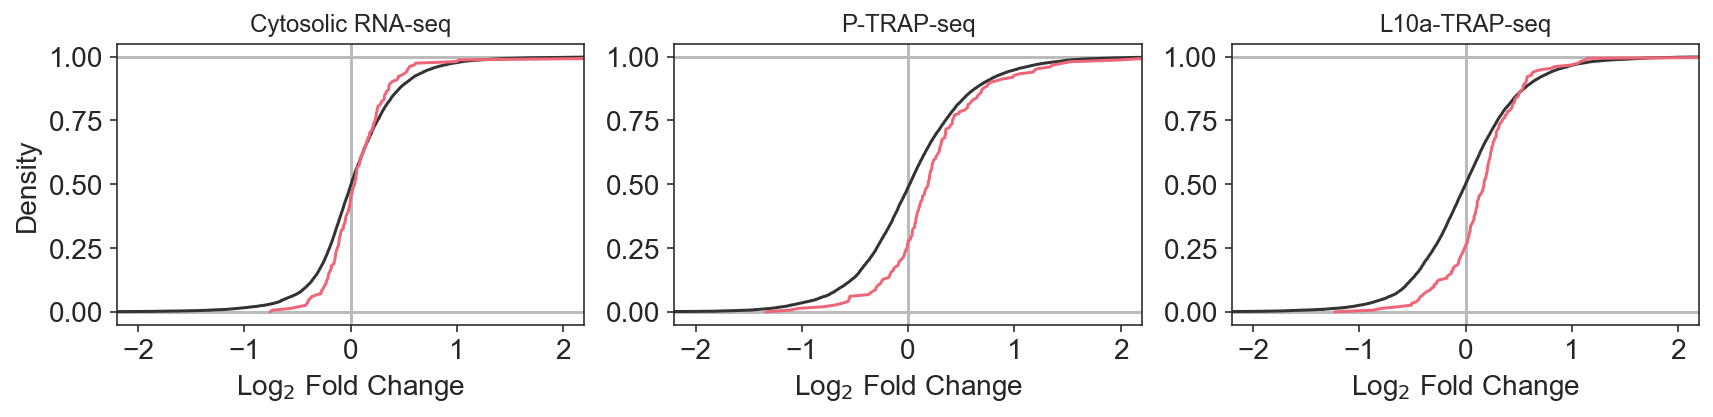

In [16]:
# subplot
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 3), tight_layout=True)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title("Cytosolic RNA-seq")
ax2.set_title("P-TRAP-seq")
ax3.set_title("L10a-TRAP-seq")

for ax, df in zip((ax1, ax2, ax3), (df1, df2, df3)):
    ax.tick_params(direction="out", labelsize=14)    
    ax.axhline(0, -40, 40, color=grey, linewidth=1.5)
    ax.axhline(1, -40, 40, color=grey, linewidth=1.5)
    ax.axvline(0, -40, 40, color=grey, linewidth=1.5)
    ax.set_xlim(-2.2, 2.2)
    ax.set_xlabel("Log" + "$_{2}$" + " Fold Change", fontsize=14)
    ax1.set_ylabel("Density", fontsize=14)
    
    data1 = df["log2FC"]                                                  # control (total genes)
    data2 = df[df["polysome"] == 1]["log2FC"]          # Preferential translation uopn eIF2a-P

    MannResult = stats.mannwhitneyu(data1, data2, alternative="two-sided")
    pvalue = round(MannResult.pvalue, 10)
    print(f"Mann Whitney U test (Polysome): {pvalue}")

    ax.plot(np.sort(data1), 1 * np.arange(len(data1)) / (len(data1) - 1), color=black, label="Back ground (all genes)")
    ax.plot(np.sort(data2), 1 * np.arange(len(data2)) / (len(data2) - 1), color=red, label="Preferentially translated upon eIF2a-p")

fig.savefig("../results/figure_4/Densityplot_ReadCount.pdf", bbox_inches="tight", transparent=True)

## 小胞体ストレス関連遺伝子の発現がTPG処理で上昇しているかどうか調べる¶
小胞体ストレス応答で発現が上がる典型的な遺伝子 (PDIA4, XBP1, HERPUD1, HSPA5, DDIT3, DNAJC3) についてThapsigargine処理でCPMが上昇しているかどうか調べる。

In [17]:
def normalized_cpm(df):
    return 10 ** 6 * df / df.sum()

In [18]:
samples = ["DMSO-Total-1", "DMSO-Total-2", "DMSO-Total-3", "TPG-Total-1", "TPG-Total-2", "TPG-Total-3",
                    "DMSO-P0-1", "DMSO-P0-2", "DMSO-P0-3", "TPG-P0-1", "TPG-P0-2", "TPG-P0-3",
                    "DMSO-L10a-1", "DMSO-L10a-2", "DMSO-L10a-3", "TPG-L10a-1", "TPG-L10a-2", "TPG-L10a-3"]

In [19]:
df = pd.read_csv("../slamdunk/csv/allreads.csv", index_col="Name").drop(["Chromosome", "Start", "End", "Length", "Strand"], axis=1)
df.columns = samples

df_cpm = normalized_cpm(df)  # CPM正規化

df_cpm["index"] = df_cpm.index
df_cpm["gene"] = df_cpm.apply(get_gene_name, axis=1)

df_cpm = df_cpm.drop(columns="index")

df_cpm.head()

,DMSO-Total-1,DMSO-Total-2,DMSO-Total-3,TPG-Total-1,TPG-Total-2,TPG-Total-3,DMSO-P0-1,DMSO-P0-2,DMSO-P0-3,TPG-P0-1,TPG-P0-2,TPG-P0-3,DMSO-L10a-1,DMSO-L10a-2,DMSO-L10a-3,TPG-L10a-1,TPG-L10a-2,TPG-L10a-3,gene
Name,,,,,,,,,,,,,,,,,,,
OR4F5|ENSG00000186092.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,OR4F5
SAMD11|ENSG00000187634.13,194.403243,160.185979,173.713585,218.893622,207.731563,205.830403,233.105388,221.806801,226.708269,255.687486,259.561858,221.732985,153.680679,86.077881,185.036978,195.577994,119.844149,134.963490,SAMD11
NOC2L|ENSG00000188976.11,161.883143,146.541518,147.832699,143.771090,135.093808,140.199451,131.985560,163.209238,162.764911,273.298045,189.905075,163.533760,141.682646,87.158357,118.629664,174.926901,113.035882,117.577607,NOC2L
KLHL17|ENSG00000187961.15,11.238564,6.140008,10.433655,15.268807,14.527551,19.209059,8.868140,7.230789,9.203968,8.359443,12.834792,13.640443,3.881716,7.803434,7.679757,14.698719,6.715003,8.804390,KLHL17
PLEKHN1|ENSG00000187583.11,1.315151,1.364446,1.761526,0.488602,0.000000,0.266792,0.000000,0.375625,0.000000,1.560429,0.249219,0.000000,0.264662,0.960423,0.180700,7.045667,1.025903,0.891584,PLEKHN1


In [20]:
df_melt = pd.melt(df_cpm, id_vars="gene")
df_melt.head()

,gene,variable,value
0,OR4F5,DMSO-Total-1,0.000000
1,SAMD11,DMSO-Total-1,194.403243
2,NOC2L,DMSO-Total-1,161.883143
3,KLHL17,DMSO-Total-1,11.238564
4,PLEKHN1,DMSO-Total-1,1.315151


In [21]:
def get_condition(df):
    return df["variable"].split("-")[0]

def get_protocol(df):
    method = df["variable"].split("-")[1]
    if method != "Total":
        return method
    else:
        return "RNA"

df_melt["condition"] = df_melt.apply(get_condition, axis=1)
df_melt["protocol"] = df_melt.apply(get_protocol, axis=1)

df_melt.head()

,gene,variable,value,condition,protocol
0,OR4F5,DMSO-Total-1,0.000000,DMSO,RNA
1,SAMD11,DMSO-Total-1,194.403243,DMSO,RNA
2,NOC2L,DMSO-Total-1,161.883143,DMSO,RNA
3,KLHL17,DMSO-Total-1,11.238564,DMSO,RNA
4,PLEKHN1,DMSO-Total-1,1.315151,DMSO,RNA


In [22]:
df_melt = df_melt.sort_values("protocol", ascending=False)

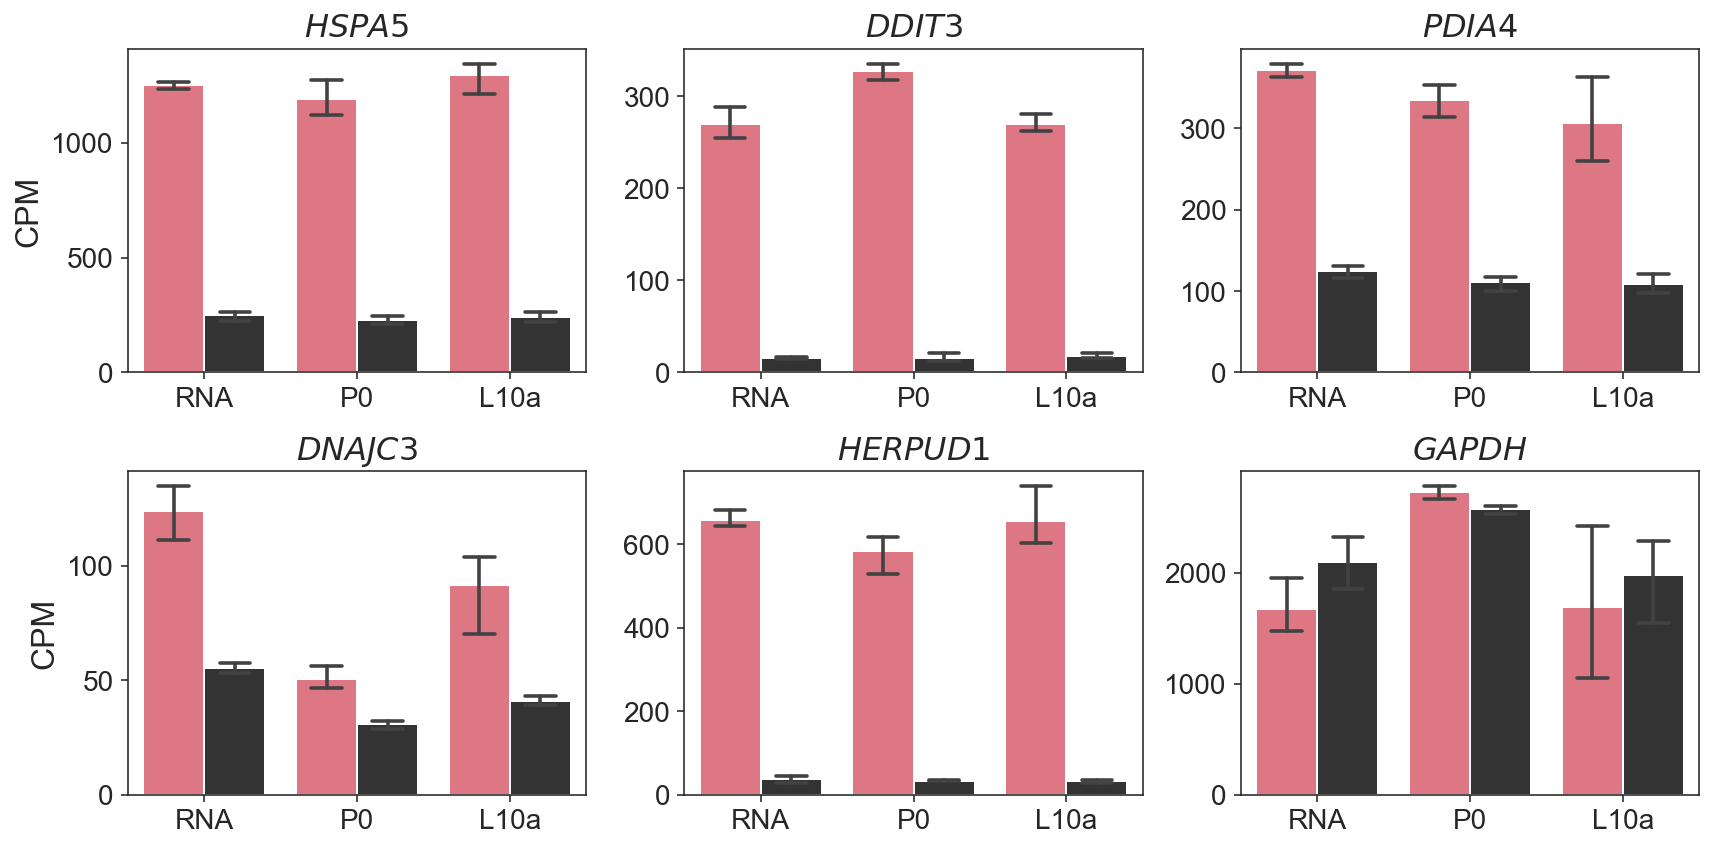

In [23]:
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 6), tight_layout=True)
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

palette = {"DMSO":black, "TPG":red}

for ax, gene in zip((ax1, ax2, ax3, ax4, ax5, ax6), ("HSPA5", "DDIT3", "PDIA4", "DNAJC3", "HERPUD1", "GAPDH")):
    
    tmp = df_melt[df_melt["gene"] == gene]
    sns.barplot(x="protocol", y="value", hue="condition", palette=palette, data=tmp, ax=ax, capsize=0.2, errwidth=1.8)

    ax.tick_params(direction="out", labelsize=14)
    ax.get_legend().set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"$\it{gene}$", fontsize=16)

ax1.set_ylabel("CPM", fontsize=16)
ax4.set_ylabel("CPM", fontsize=16)

fig.savefig("../results/figure_4/BarPlot_ReadCount.pdf", bbox_inches="tight", transparent=True)

### P-TRAPとL10a-TRAPで発現変動遺伝子がどの程度一致するか調べる

In [24]:
df1 = pd.read_csv("../rscript/deseq2_v2/result/Total_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(readCount)")
df2 = pd.read_csv("../rscript/deseq2_v2/result/P-TRAP_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(readCount)")
df3 = pd.read_csv("../rscript/deseq2_v2/result/L10a-TRAP_DMSOvsTPG_All_DESeq2.txt", sep="\t", index_col="rownames(readCount)")

df1["zero"] = df1.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df2["zero"] = df2.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df3["zero"] = df3.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df1 = df1[df1["zero"] == 0]
df2 = df2[df2["zero"] == 0]
df3 = df3[df3["zero"] == 0]

df1["log2_baseMean"] = df1["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)
df2["log2_baseMean"] = df2["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)
df3["log2_baseMean"] = df3["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)

df1["deg"] = df1.apply(is_deg, axis=1) 
df2["deg"] = df2.apply(is_deg, axis=1)
df3["deg"] = df3.apply(is_deg, axis=1)    

RNA-seq, P-TRAP-seq, L10-TRAP-seq で得られた遺伝子 (リードカウント0がないもの) で共通の遺伝子を抽出

In [25]:
RNA = np.array(df1.index)
P0 = np.array(df2.index)
L10a = np.array(df3.index)

common_genes = set(RNA) & set(P0) & set(L10a)
len(common_genes)

10451

`isin()`を使ってインデックスの各値が common_genes に含まれているか判定。Trueの行を抽出。

In [26]:
df1 = df1[df1.index.isin(common_genes)]
df2 = df2[df2.index.isin(common_genes)]
df3 = df3[df3.index.isin(common_genes)]

発現変動遺伝子の被りを調べるためにベン図を書く。

In [27]:
from matplotlib_venn import venn2, venn3

In [28]:
DEGs_up_RNA = set(df1[df1["deg"] == "up"].index)
DEGs_up_P0 = set(df2[df2["deg"] == "up"].index)
DEGs_up_L10a = set(df3[df3["deg"] == "up"].index)

DEGs_down_RNA = set(df1[df1["deg"] == "down"].index)
DEGs_down_P0 = set(df2[df2["deg"] == "down"].index)
DEGs_down_L10a = set(df3[df3["deg"] == "down"].index)

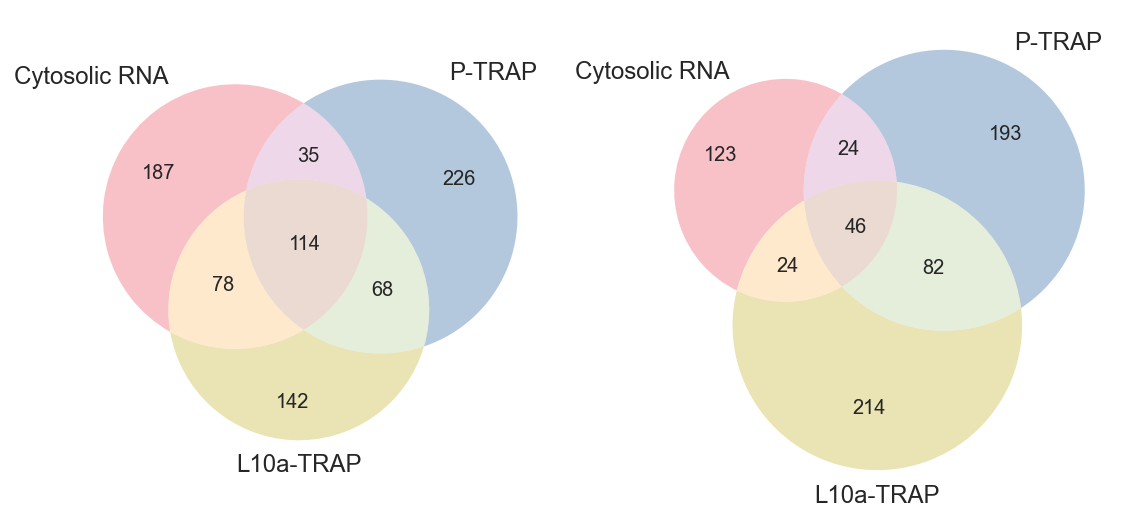

In [29]:
fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

venn3([DEGs_up_RNA, DEGs_up_P0, DEGs_up_L10a], set_labels=("Cytosolic RNA", "P-TRAP", "L10a-TRAP"), set_colors=(red, blue, yellow), ax=ax1)
venn3([DEGs_down_RNA, DEGs_down_P0, DEGs_down_L10a], set_labels=("Cytosolic RNA", "P-TRAP", "L10a-TRAP"), set_colors=(red, blue, yellow), ax=ax2)

fig.savefig("../results/figure_4/Venn_ReadCount.pdf", bbox_inches="tight", transparent=True)